In [36]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.colors import ListedColormap
import os

from skimage import data, io, filters, color
from skimage.filters import threshold_otsu, threshold_adaptive


In [46]:
threshold_otsu(cropped[:,:,0])

201

/home/garner1/anaconda2/lib/python2.7/site-packages/skimage/filters/thresholding.py:271: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (160, 160, 3) looks like an RGB image
  warn(msg.format(image.shape))
/home/garner1/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)
/home/garner1/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)
/home/garner1/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)
/home/garner1/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning

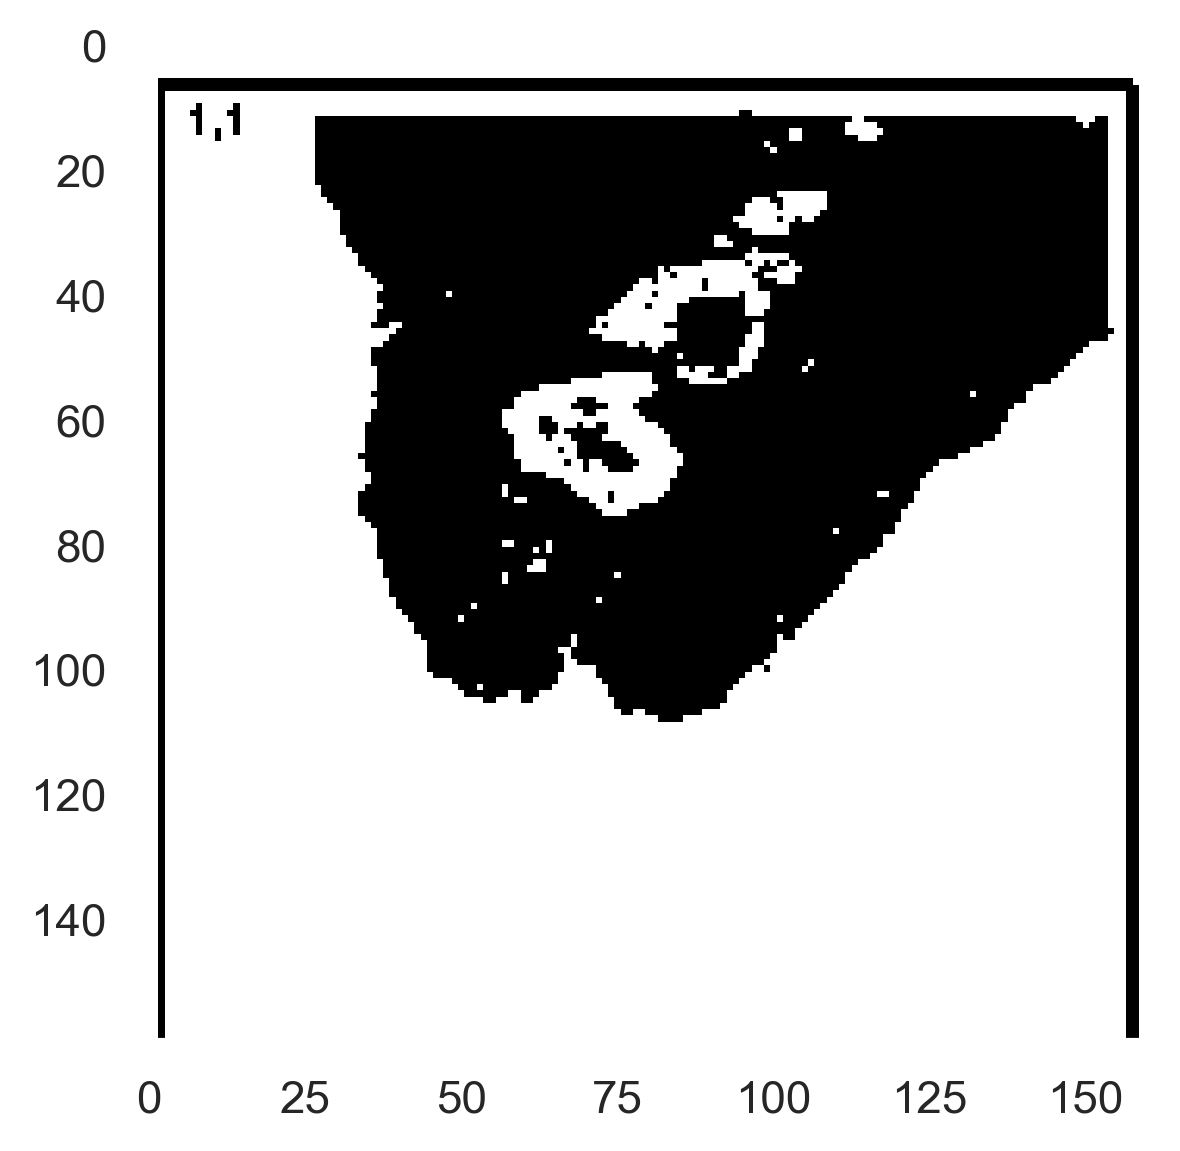

/home/garner1/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)
/home/garner1/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


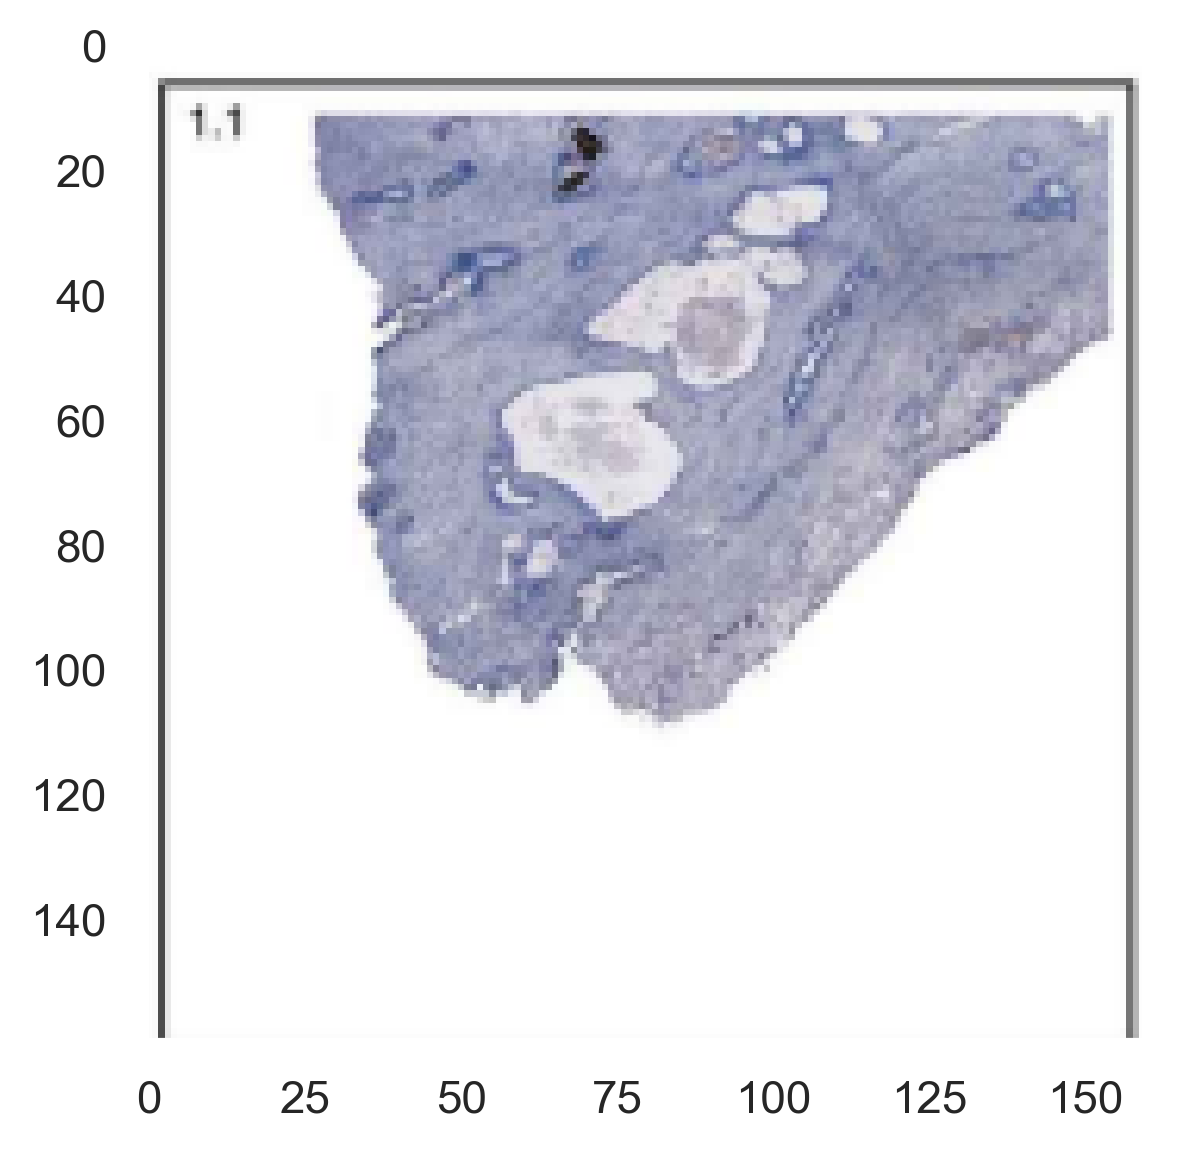

In [55]:
# %matplotlib

# import matplotlib as mpl
# mpl.rcParams['figure.dpi']= 300

filepath = '/home/garner1/Work/dataset/SSF/prostate-twelve/slides.tif'
slide = io.imread(filepath)
cropped = slide[100:260,100:260,:]



edges = filters.sobel(cropped[:,:,0])

plt.figure()
# io.imshow(color.rgb2hsv(cropped)) #does not keep the high resolution

global_thresh = threshold_otsu(cropped)
binary_global = cropped[:,:,0] > global_thresh
io.imshow(binary_global) #does not keep the high resolution
plt.grid(False)

plt.figure()
io.imshow(cropped) #does not keep the high resolution
plt.grid(False)

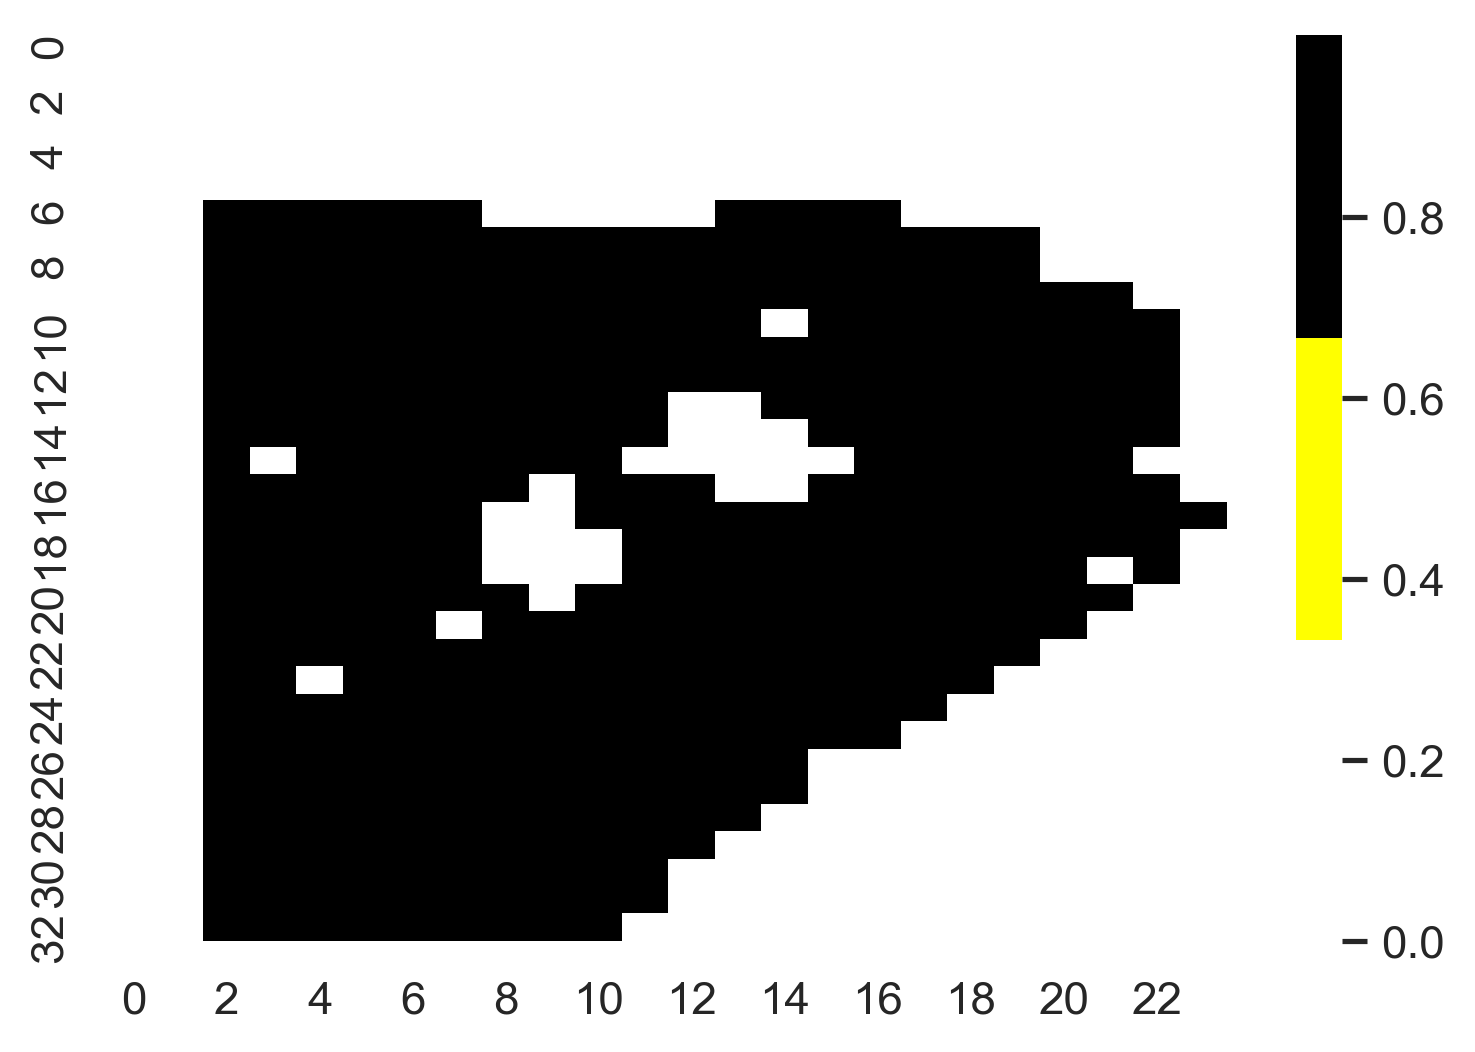

In [52]:
import numpy as np

npzfile = np.load('matglobalep11.npz')
sns.heatmap(npzfile['arr_0'], cmap=ListedColormap(['white', 'yellow', 'black']), annot=False)


/home/garner1/anaconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/garner1/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)
/home/garner1/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)
/home/garner1/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


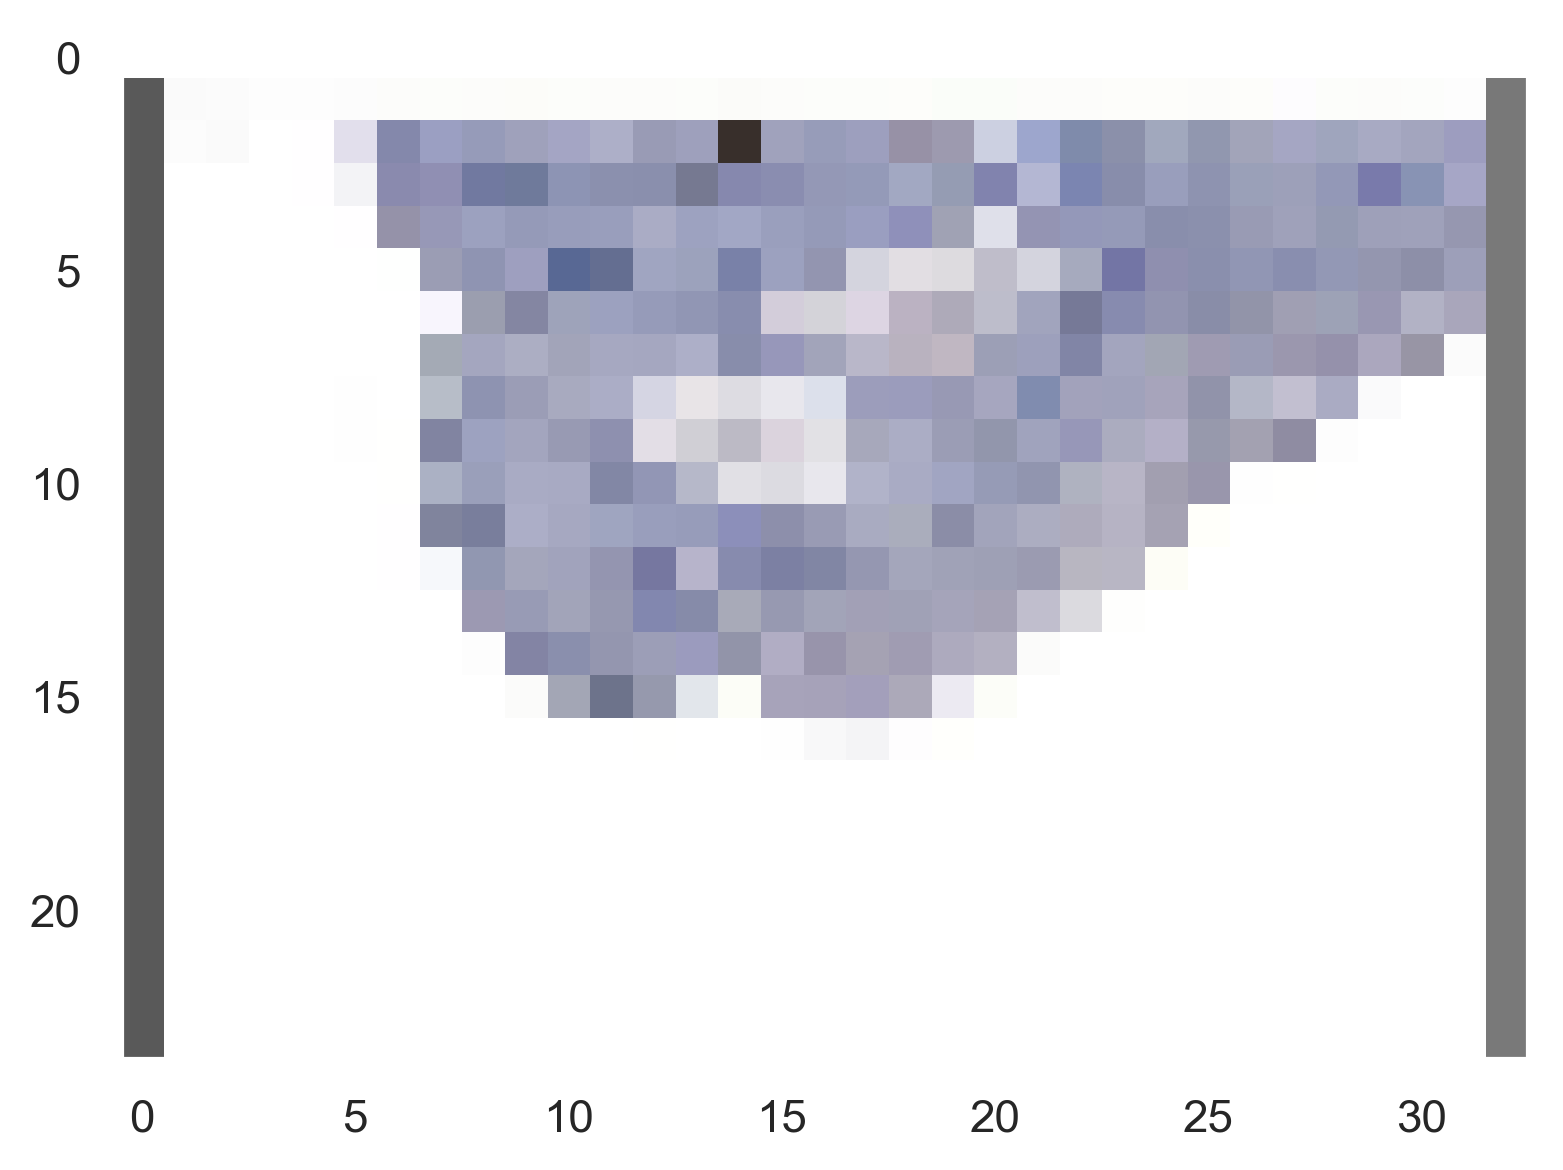

In [31]:
from skimage.transform import resize

image_resized = resize(cropped, (npzfile['arr_0'].shape[1],npzfile['arr_0'].shape[0]))
io.imshow(image_resized) #does not keep the high resolution
plt.grid(False)